# Weather Analysis

---


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### OpenWeatherMap API is used to retrieve weather data from the cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm a sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city_name in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city_name}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_name))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Number of cities in the list: 613
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuku'alofa
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | beira
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | miracatu
Processing Record 9 of Set 1 | cheste
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | moultonborough
Processing Record 15 of Set 1 | fortaleza
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | rapid valley
Processing Record 19 of Set 1 | at taj
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of 

In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Convert temperature from Kelvin to Celsius and Fahrenheit
city_data_df['Max Temp (C)'] = city_data_df['Max Temp'] - 273.15
city_data_df['Max Temp (F)'] = city_data_df['Max Temp (C)'] * 9/5 + 32

# Show Record Count
print(city_data_df.count())

# Display sample data
print(city_data_df.head())

City            587
Lat             587
Lng             587
Max Temp        587
Humidity        587
Cloudiness      587
Wind Speed      587
Country         587
Date            587
Max Temp (C)    587
Max Temp (F)    587
dtype: int64
              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       nuku'alofa -21.1333 -175.2000    301.34        89         100   
1  remire-montjoly   4.9167  -52.2667    299.17        89          75   
2    blackmans bay -43.0167  147.3167    292.22        68          98   
3     puerto ayora  -0.7393  -90.3518    299.01        99           8   
4     richards bay -28.7830   32.0377    300.31        51          21   

   Wind Speed Country        Date  Max Temp (C)  Max Temp (F)  
0        5.66      TO  1707725623         28.19        82.742  
1        3.09      GF  1707725624         26.02        78.836  
2        2.91      AU  1707725624         19.07        66.326  
3        1.34      EC  1707725625         25.86        78.548  
4       

In [4]:
# Check if the output directory exists, create it if not
output_dir = "resources"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
output_path = os.path.join(output_dir, "cities.csv")
city_data_df.to_csv(output_path, index_label="City_ID")
print("Data saved to:", output_path)

# Read saved data
city_data_df_saved = pd.read_csv(output_path, index_col="City_ID")

Data saved to: resources\cities.csv


## Create the Scatter Plots Requested


---
#### Latitude Vs. Temperature

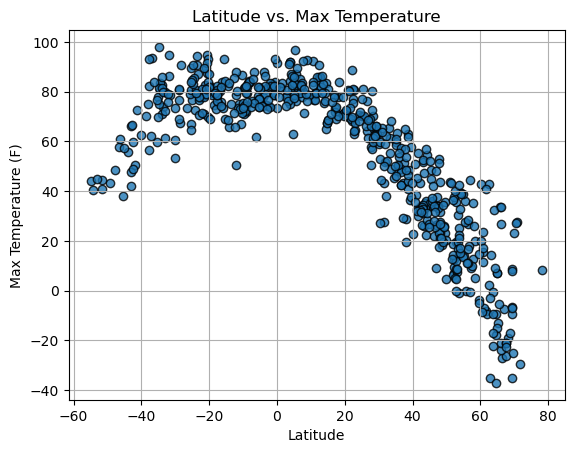

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (F)"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure to the resources folder
output_dir = "resources"
os.makedirs(output_dir, exist_ok=True) 
output_path = os.path.join(output_dir, "Latitude_vs_Temperature.png")
plt.savefig(output_path)

# Show plot
plt.show()

---
#### Latitude Vs. Humidity

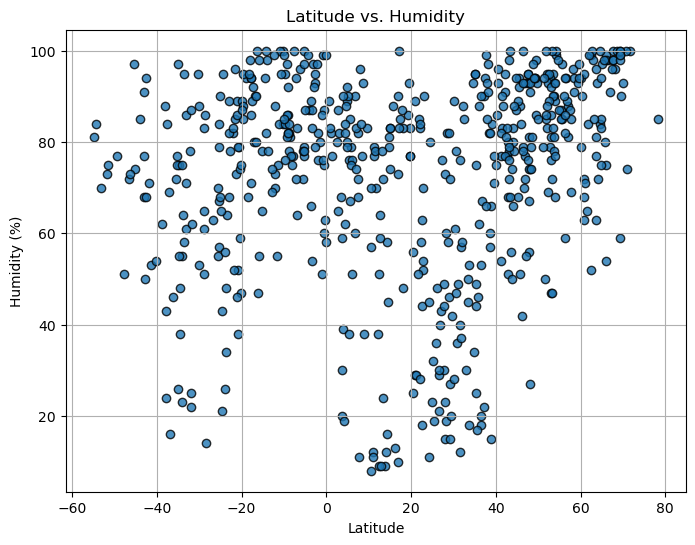

In [6]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_dir = "resources"
os.makedirs(output_dir, exist_ok=True) 
output_path = os.path.join(output_dir, "Latitude_vs_Humidity.png")
plt.savefig(output_path)

# Show plot
plt.show()


---
#### Latitude Vs. Cloudiness


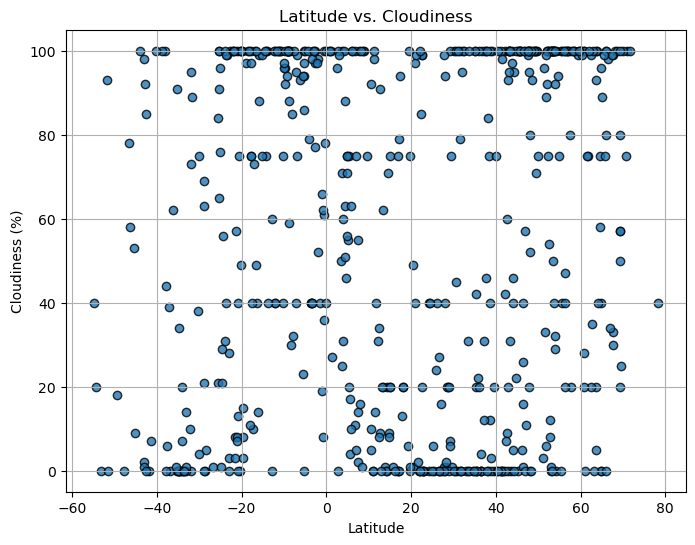

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_dir = "resources"
os.makedirs(output_dir, exist_ok=True) 
output_path = os.path.join(output_dir, "Latitude_vs_Cloudiness.png")
plt.savefig(output_path)

# Show plot
plt.show()



---
#### Latitude vs. Wind Speed

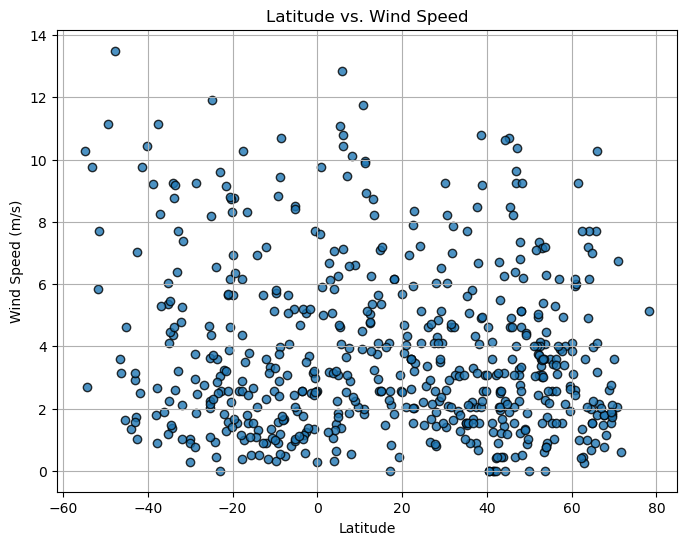

In [8]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_dir = "resources"
os.makedirs(output_dir, exist_ok=True) 
output_path = os.path.join(output_dir, "Latitude_vs_WindSpeed.png")
plt.savefig(output_path)

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_file):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.8)
    plt.plot(x_values, regress_values, "r-", label="Linear Regression")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    # Save the figure to the resources folder
    output_dir = "resources"
    os.makedirs(output_dir, exist_ok=True) 
    output_path = os.path.join(output_dir, output_file)
    plt.savefig(output_path)
    
    # Show plot
    plt.show()


#### Northern Hemisphere data (Latitude >= 0)

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
print(northern_hemisphere_df.head())

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1   remire-montjoly   4.9167  -52.2667    299.17        89          75   
6          bilibino  68.0546  166.4372    244.83        96         100   
8            cheste  39.4833   -0.6833    287.43        71          20   
9            albany  42.6001  -73.9662    274.38        77           9   
11      yellowknife  62.4560 -114.3525    256.71        99          99   

    Wind Speed Country        Date  Max Temp (C)  Max Temp (F)  
1         3.09      GF  1707725624         26.02        78.836  
6         1.16      RU  1707725627        -28.32       -18.976  
8         3.09      ES  1707725628         14.28        57.704  
9         0.89      US  1707725473          1.23        34.214  
11        1.34      CA  1707725480        -16.44         2.408  


#### Southern Hemisphere data (Latitude < 0)

In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
print(southern_hemisphere_df.head())

            City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     nuku'alofa -21.1333 -175.2000    301.34        89         100   
2  blackmans bay -43.0167  147.3167    292.22        68          98   
3   puerto ayora  -0.7393  -90.3518    299.01        99           8   
4   richards bay -28.7830   32.0377    300.31        51          21   
5          beira -19.8436   34.8389    301.20        89         100   

   Wind Speed Country        Date  Max Temp (C)  Max Temp (F)  
0        5.66      TO  1707725623         28.19        82.742  
2        2.91      AU  1707725624         19.07        66.326  
3        1.34      EC  1707725625         25.86        78.548  
4        2.96      ZA  1707725625         27.16        80.888  
5        5.66      MZ  1707725626         28.05        82.490  


---
###  Temperature vs. Latitude Linear Regression Plot

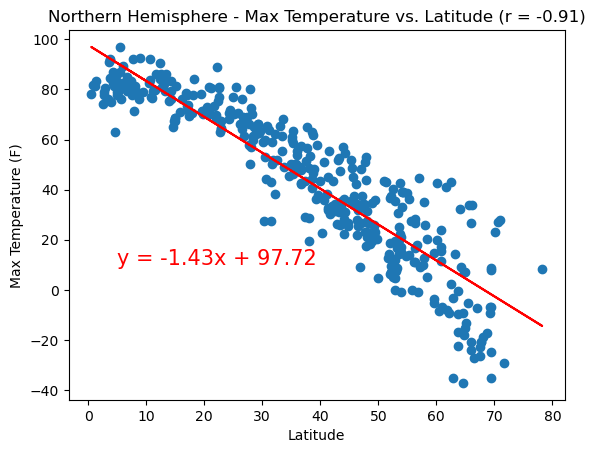

In [12]:
# Linear regression for Temperature vs. Latitude in Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp (F)'])
regress_values = slope * northern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp (F)'])
plt.plot(northern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (5, 10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Northern_Hemisphere_Temp_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


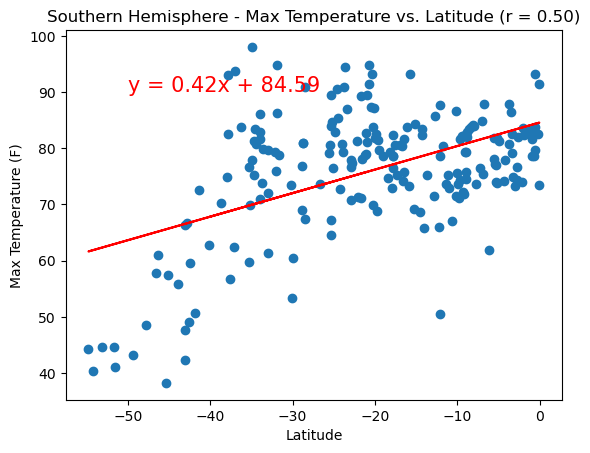

In [13]:
# Linear regression for Temperature vs. Latitude in Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp (F)'])
regress_values = slope * southern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp (F)'])
plt.plot(southern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50, 90), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Southern_Hemisphere_Temp_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


##  Temperature vs. Latitude Linear Relationship Analysis 
---

### Northern Hemisphere:
From the data analysis, it's clear that there's a consistent trend in the Northern Hemisphere: as we move away from the equator towards the North Pole, temperatures tend to drop. This makes sense, considering that the North Pole is further from the Sun compared to the equator. The strong negative correlation we observed supports this idea, showing that latitude plays a significant role in determining temperature in this hemisphere.

### Southern Hemisphere:
Conversely, in the Southern Hemisphere, we noticed a similar but opposite trend. As we move away from the equator towards the South Pole, temperatures also tend to decrease, albeit not as drastically as in the Northern Hemisphere. This suggests that latitude has a weaker influence on temperature in the Southern Hemisphere, but it's still an important factor to consider.

### Conclusion:
Overall, it's fascinating to see how latitude affects temperature distribution across different regions. While the relationship is more pronounced in the Northern Hemisphere, it's still present in the Southern Hemisphere, but to a lesser extent.


---
#### Humidity vs. Latitude Linear Regression Plot

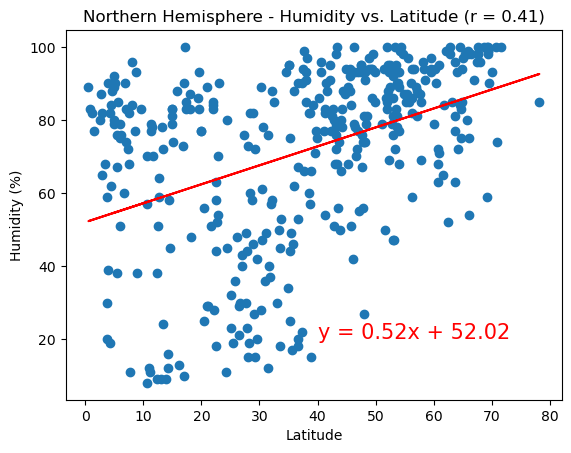

In [14]:
# Linear regression for Humidity vs. Latitude in Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'])
regress_values = slope * northern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'])
plt.plot(northern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Northern_Hemisphere_Humidity_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


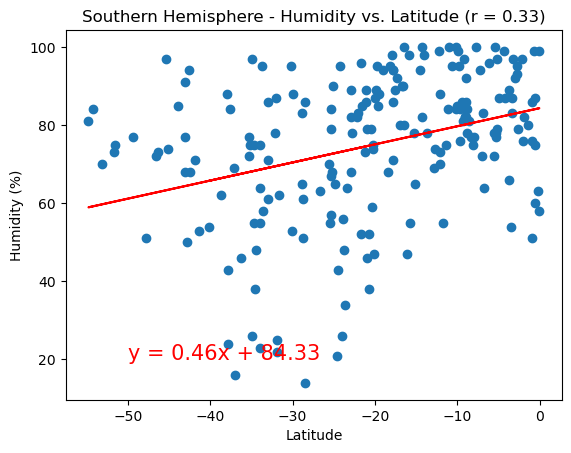

In [15]:
# Linear regression for Humidity vs. Latitude in Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'])
regress_values = slope * southern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'])
plt.plot(southern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Southern_Hemisphere_Humidity_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


##  Humidity vs. Latitude Linear Relationship Analysis 
---

### Northern Hemisphere:
Our analysis of humidity vs. latitude in the Northern Hemisphere didn't reveal a very strong relationship. While there's a slight downward trend suggesting that humidity decreases as we move away from the equator, the correlation isn't as clear as it is for temperature. This indicates that latitude might not be the only factor influencing humidity levels in this hemisphere.

### Southern Hemisphere:
In the Southern Hemisphere, we found no significant link between humidity and latitude. The data points were scattered with no clear trend, suggesting that latitude may not play an important role in regulating humidity levels in this hemisphere. Other factors, like as accessibility to bodies of water, temperature, and the wind direction, may have a bigger effect.

### Conclusion:
Overall, while there is a tendency for humidity to decrease slightly as latitude increases in the Northern Hemisphere, the relationship is not as pronounced as it is for temperature. In the Southern Hemisphere, the relationship between humidity and latitude is even weaker, with no clear trend observed. This suggests that latitude alone may not be a reliable indicator of humidity levels in different regions.

---
#### Cloudiness vs. Latitude Linear Regression Plot

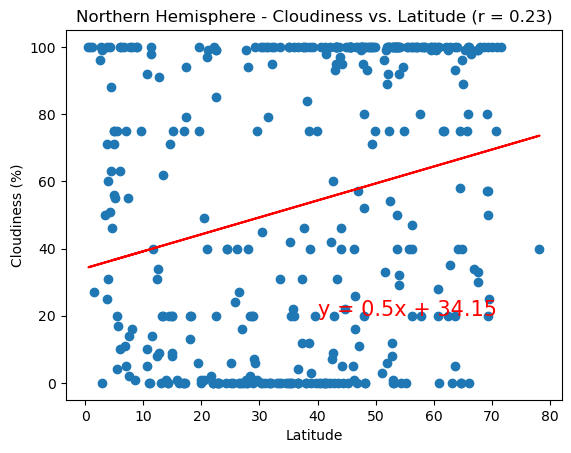

In [16]:
# Linear regression for Cloudiness vs. Latitude in Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'])
regress_values = slope * northern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'])
plt.plot(northern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Northern_Hemisphere_Cloudiness_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


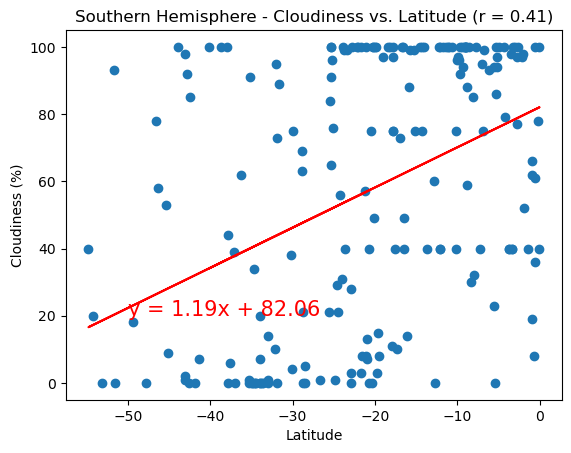

In [17]:
# Linear regression for Cloudiness vs. Latitude in Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'])
regress_values = slope * southern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'])
plt.plot(southern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Southern_Hemisphere_Cloudiness_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


##  Cloudiness vs. Latitude Linear Relationship Analysis 
---

### Northern Hemisphere:
The plot for cloudiness vs latitude for the Northern Hemisphere reveals a scattered collection of data points with no clear linear trend. The spots appear to be randomly distributed, showing that cloudiness and latitude do not correlate in this hemisphere. The r-value supports this finding, indicating a weak or negligible relationship between the two variables.

### Southern Hemisphere:
Similarly, in the Southern Hemisphere, we didn't observe a clear relationship between cloudiness and latitude. The data points were dispersed with no clear pattern, indicating that latitude might not be a reliable indicator of cloudiness levels in this hemisphere.

### Conclusion:
The analysis of cloudiness vs. latitude shows no significant linear association in either the Northern or Southern Hemispheres. The scattered distribution of data points and low r-values indicate that latitude alone may not be a good predictor of cloudiness levels across locations.

---
#### Wind Speed vs. Latitude Linear Regression Plot

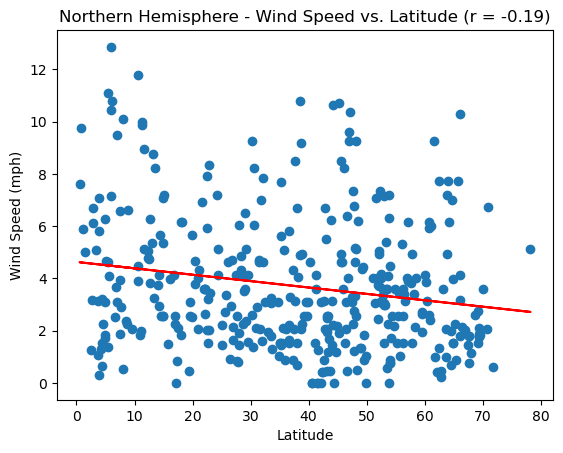

In [18]:
# Linear regression for Wind Speed vs. Latitude in Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'])
regress_values = slope * northern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'])
plt.plot(northern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Northern_Hemisphere_Wind_Speed_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


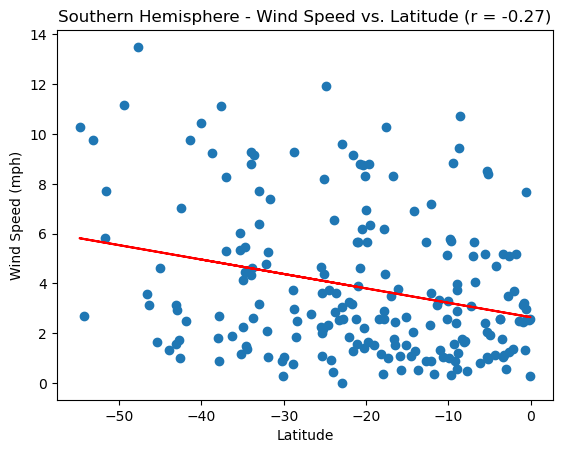

In [19]:
# Linear regression for Wind Speed vs. Latitude in Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'])
regress_values = slope * southern_hemisphere_df['Lat'] + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'])
plt.plot(southern_hemisphere_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude (r = {:.2f})'.format(rvalue))

output_file = os.path.join('resources', 'Southern_Hemisphere_Wind_Speed_vs_Latitude.png')
plt.savefig(output_file)
plt.show()


##  Wind Speed vs. Latitude Linear Relationship Analysis 
---

### Northern Hemisphere:
The plot illustrating wind speed against latitude for the Northern Hemisphere shows a weak negative linear relationship. While there is a slight downward trend, indicating a decrease in wind speed as latitude increases, the correlation is not very strong. The r-value supports this observation, suggesting a relatively weak association between wind speed and latitude in the Northern Hemisphere.

### Southern Hemisphere:
In the Southern Hemisphere, the plot of wind speed vs. latitude shows a weak linear relationship. However, the overall trend is not as evident in comparison with the Northern Hemisphere, with data points scattered and no identifiable trend present. The r-value verifies the poor relationship between wind speed and latitude in this hemisphere.

### Conclusion:
The relationship between wind speed and latitude appears to be weak in both hemispheres. While there's a slight trend suggesting that wind speed decreases further from the equator, other factors likely play a bigger role in determining wind patterns.